**4. With a suitable example demonstrate the perceptron learning law with its decision regions using python. Give the output in graphical form.**

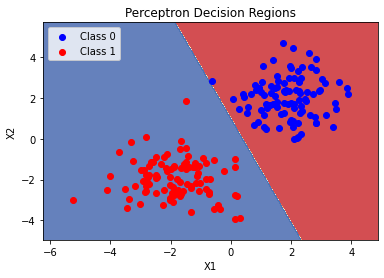

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.concatenate([np.random.randn(100, 2) + [2, 2], np.random.randn(100, 2) + [-2, -2]])
y = np.concatenate([np.zeros(100), np.ones(100)])

class Perceptron:
    def __init__(self):
        self.weights = np.zeros(2)
        self.bias = 0

    def activation(self, x):
        return np.where(x >= 0, 1, 0)

    def train(self, X, y, epochs=100, learning_rate=0.01):
        for _ in range(epochs):
            for xi, target in zip(X, y):
                prediction = self.activation(np.dot(xi, self.weights) + self.bias)
                self.weights += learning_rate * (target - prediction) * xi
                self.bias += learning_rate * (target - prediction)

    def predict(self, X):
        return self.activation(np.dot(X, self.weights) + self.bias)

perceptron = Perceptron()
perceptron.train(X, y)

xx, yy = np.meshgrid(np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.02),
                     np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.02))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(*X[y == 0].T, color='blue', label='Class 0')
plt.scatter(*X[y == 1].T, color='red', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron Decision Regions')
plt.legend()
plt.show()